# Modelo de previsão climática usando machine learning no python
## O modelo usará como dataset : https://www.kaggle.com/datasets/saraivaufc/conventional-weather-stations-brazil

### O modelo irá tentar prever se choveu ou não baseado em certas condições  após a análise dos dados

# Importando bibliotecas necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Lendo o dataset

In [ ]:
dados_clima = pd.read_csv("C:\\Users\gabri\OneDrive\Área de Trabalho\code\conventional_weather_stations_inmet_brazil_1961_2019.csv",sep=';')

# Analisando o dataset


In [ ]:
dados_clima.head()

In [67]:
dados_clima.shape

(12251335, 20)

In [6]:
dados_clima.dtypes

Estacao                        int64
Data                          object
Hora                           int64
Precipitacao                 float64
TempBulboSeco                float64
TempBulboUmido               float64
TempMaxima                   float64
TempMinima                   float64
UmidadeRelativa              float64
PressaoAtmEstacao            float64
PressaoAtmMar                float64
DirecaoVento                 float64
VelocidadeVento              float64
Insolacao                    float64
Nebulosidade                 float64
Evaporacao Piche             float64
Temp Comp Media              float64
Umidade Relativa Media       float64
Velocidade do Vento Media    float64
Unnamed: 19                  float64
dtype: object

In [7]:
dados_clima.index = pd.to_datetime(dados_clima.Data,format="%d/%m/%Y")

# Precipitação media por ano 

In [8]:
precipitacao_media_brasil = dados_clima.groupby(dados_clima.index.year).Precipitacao.mean()
precipitacao_media_brasil.head()

Data
1961    4.103305
1962    3.938935
1963    3.445833
1964    4.622385
1965    4.303944
Name: Precipitacao, dtype: float64

<AxesSubplot: title={'center': 'Precipitacao media por ano no Brasil'}, xlabel='Data'>

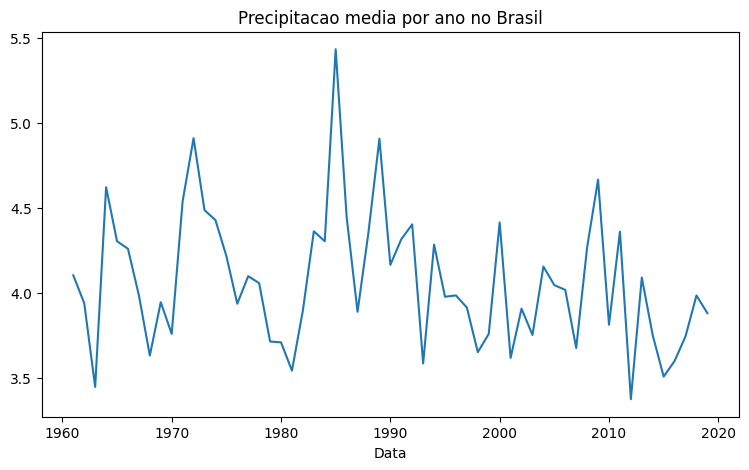

In [9]:
plt.figure(figsize=(9,5))
plt.title("Precipitacao media por ano no Brasil")
precipitacao_media_brasil.plot()

# Evolução do volume de chuvas

<AxesSubplot: xlabel='Data'>

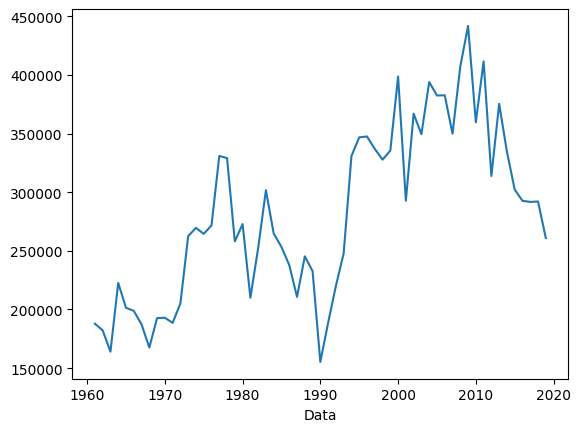

In [10]:
chuva = dados_clima.Precipitacao.fillna(0)
chuva.groupby(chuva.index.year).sum().plot()

# Selecionando as features e o target

### - Particionando o Dataset escolhendo uma sample de 50000

In [110]:
features = ['Estacao','TempBulboSeco','TempBulboUmido',"UmidadeRelativa","TempMaxima","TempMinima",
                 'PressaoAtmEstacao','PressaoAtmMar','Insolacao','Nebulosidade','Evaporacao Piche',"Temp Comp Media",
                 "Umidade Relativa Media"]
dados_2010 = dados_clima[dados_clima.index.year >= 2010].sample(50000,random_state=42)
dados_2010

,Estacao,Data,Hora,Precipitacao,TempBulboSeco,TempBulboUmido,TempMaxima,TempMinima,UmidadeRelativa,PressaoAtmEstacao,PressaoAtmMar,DirecaoVento,VelocidadeVento,Insolacao,Nebulosidade,Evaporacao Piche,Temp Comp Media,Umidade Relativa Media,Velocidade do Vento Media,Unnamed: 19
Data,,,,,,,,,,,,,,,,,,,,
2015-08-24,83589,24/08/2015,1800,NaN,29.0,20.0,NaN,NaN,41.0,938.0,1010.1,14.0,2.10000,NaN,4.00,NaN,NaN,NaN,NaN,NaN
2013-07-02,82797,02/07/2013,1800,NaN,22.6,21.6,NaN,NaN,92.0,966.5,1013.7,18.0,3.00000,NaN,10.00,NaN,NaN,NaN,NaN,NaN
2018-08-12,82659,12/08/2018,1800,NaN,33.0,NaN,NaN,NaN,47.0,985.1,1010.6,5.0,1.02888,NaN,8.75,NaN,NaN,NaN,NaN,NaN
2012-08-26,82798,26/08/2012,0,NaN,24.8,21.8,29.2,NaN,75.0,1017.2,1019.3,14.0,2.80000,9.7,8.00,2.2,25.58,77.75,3.066667,NaN
2014-04-13,83842,13/04/2014,0,NaN,20.5,19.4,24.2,NaN,89.0,912.0,1014.1,27.0,1.60000,1.8,9.00,1.6,18.72,84.25,1.133333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-05,83589,05/08/2018,1200,0.0,16.9,16.5,NaN,15.1,96.0,942.3,1016.1,0.0,0.00000,NaN,10.00,NaN,NaN,NaN,NaN,NaN
2017-10-16,83377,16/10/2017,0,NaN,25.8,NaN,33.4,NaN,36.0,886.5,1009.5,0.0,0.00000,10.5,1.25,NaN,27.50,31.00,7.202160,NaN
2011-02-01,82768,01/02/2011,1200,4.0,25.8,23.8,NaN,21.4,83.0,983.7,1013.0,5.0,1.00000,NaN,10.00,NaN,NaN,NaN,NaN,NaN


In [111]:
mask = dados_2010[features].fillna(dados_2010.mean())
mask = mask.fillna(mask.mean())
X = mask.groupby(by=[dados_2010.index.date,'Estacao']).mean()
X.shape


C:\Users\gabri\AppData\Local\Temp\ipykernel_16076\772925480.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = dados_2010[features].fillna(dados_2010.mean())


(49038, 12)

In [112]:
y = (dados_2010[['Precipitacao','Estacao']].fillna(0))
y.Precipitacao.apply(lambda x : 0 if x == 0 else 1 )
y = y.groupby(by=[y.index.date,'Estacao']).sum()
y = y.Precipitacao.apply(lambda x : 0 if x == 0 else 1 )
y

            Estacao
2010-01-01  82024      0
            82067      0
            82410      1
            82476      0
            82586      0
                      ..
2019-12-31  82979      0
            82990      0
            83488      0
            83669      1
            83836      0
Name: Precipitacao, Length: 49038, dtype: int64

# Particionando em treino e teste


In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
X_train.shape

(36778, 12)

In [114]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [115]:
print(np.unique(y_train))

[0 1]


# Treinando o Modelo

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


In [117]:
grid_params = {
    'n_neighbors': [x for x in range(50)],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhatan']}

In [118]:
knn = KNeighborsClassifier()
knn_model = RandomizedSearchCV(knn,grid_params,n_iter = 10, cv = 10, verbose=4, random_state=42, n_jobs = -1)
knn_model.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\skl

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhatan'],
                                        'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7,
                                                        8, 9, 10, 11, 12, 13,
                                                        14, 15, 16, 17, 18, 19,
                                                        20, 21, 22, 23, 24, 25,
                                                        26, 27, 28, 29, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=4)

In [119]:
y_predict = knn_model.predict(X_test)

In [135]:
df = pd.DataFrame({"Predict":y_predict,"Actual": y_test})
df[df.Predict == df.Actual].shape[0] / df.shape[0]

0.9129690048939642

In [134]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
((tn+tp)/(fp+fn))**-1

0.09532743679085143